In [33]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [34]:
digits.data.shape

(1797, 64)

In [35]:
digits.target.shape

(1797,)

In [36]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Splitting train test set

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

### Fit into Gaussian Naive Bayes model

In [40]:
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()
GNB.fit(X_train,y_train)
y_GNB = GNB.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_GNB)

0.8333333333333334

Text(113.9222222222222, 0.5, 'True Value')

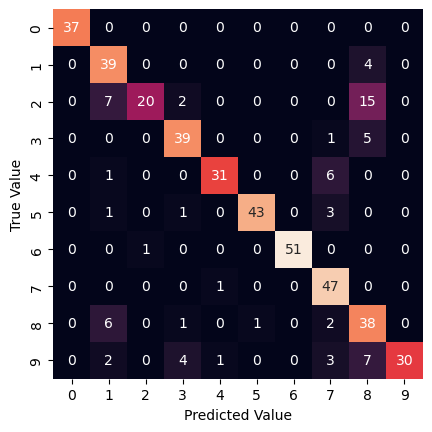

In [42]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_GNB)
sns.heatmap(matrix, square = True, annot = True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

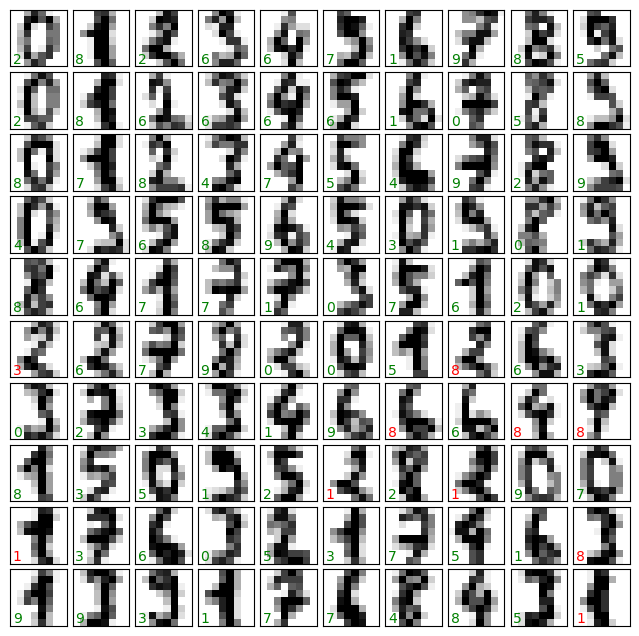

In [43]:
#visualize data with predicted label
#green for correct prediction
#red for incorrect prediction
fig,axes = plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest'),
    ax.text(0.05,0.05,str(y_GNB[i]),
           transform=ax.transAxes, 
            color = 'green' if (y_test[i]==y_GNB[i]) 
                               else 'red')